## Carregando os dados

In [3]:
# Importando as bibliotecas
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

In [4]:
# Lendo o arquivo
current_dir = os.getcwd()
data_path = os.path.abspath(os.path.join(current_dir, "..", "data", "raw"))
dados = pd.read_csv(os.path.join(data_path, "emp_automovel.csv"))
dados

,receita_cliente,anuidade_emprestimo,anos_casa_propria,telefone_trab,avaliacao_cidade,score_1,score_2,score_3,score_social,troca_telefone,inadimplente
0,12600.000000,3569.400000,12.157324,1,2.0,0.057153,0.527227,0.513171,0.117428,2545.000000,0
1,9000.000000,2722.188351,7.000000,0,2.0,0.657661,0.285898,0.614414,0.222700,495.000000,0
2,15750.000000,4477.500000,12.000000,0,2.0,0.501213,0.695423,0.513171,0.117428,1212.000000,0
3,9000.000000,1309.050000,12.157324,0,3.0,0.501213,0.155973,0.513171,0.117428,515.000000,0
4,7650.000000,1125.000000,12.157324,0,2.0,0.294328,0.152076,0.513171,0.117428,162.000000,0
...,...,...,...,...,...,...,...,...,...,...,...
54020,16855.246324,675.000000,12.157324,1,2.0,0.501213,0.180635,0.513171,0.082500,0.000000,1
54021,11250.000000,675.000000,14.000000,0,3.0,0.409620,0.606002,0.513171,0.117428,466.000000,1
54022,13500.000000,900.000000,64.000000,0,2.0,0.162632,0.525412,0.513171,0.117428,962.106056,1
54023,11250.000000,2371.500000,12.157324,0,3.0,0.501213,0.664027,0.513171,0.117428,482.000000,1


## Modelagem

In [5]:
# Separação de dados - Variável alvo e variáveis explicativas
x = dados.drop('inadimplente', axis=1)
y = dados['inadimplente']

In [6]:
# Modelo - Árvore de Decisão
modelo = DecisionTreeClassifier()
modelo.fit(x, y)
modelo.score(x, y)

1.0

In [7]:
print(f'Acurácia: {modelo.score(x,y)}')

Acurácia: 1.0


#### Aprimorando o modelo

In [8]:
# Separação dos dados em treino, validação e teste.
x, x_teste, y, y_teste = train_test_split(x,y, test_size=0.15, stratify = y, random_state=5)
x_treino, x_val, y_treino, y_val = train_test_split(x, y, stratify=y, random_state=5)


In [9]:
# Validando o Modelo
modelo = DecisionTreeClassifier()
modelo.fit(x_treino, y_treino)
print(f'Acurácia de treino: {modelo.score(x_treino, y_treino)}')
print(f'Acurácia de validação: {modelo.score(x_val, y_val)}')

Acurácia de treino: 1.0
Acurácia de validação: 0.8486194582353453


In [10]:
# Validando o Modelo, restrindindo a profundidade da árvore.
modelo = DecisionTreeClassifier(max_depth=10)
modelo.fit(x_treino, y_treino)
print(f'Acurácia de treino: {modelo.score(x_treino, y_treino)}')
print(f'Acurácia de validação: {modelo.score(x_val, y_val)}')

Acurácia de treino: 0.9205865272938444
Acurácia de validação: 0.9057573382109573


In [11]:
# Matriz de Confusão
from sklearn.metrics import confusion_matrix

In [12]:
# Armazenar os dados preditos
y_previsto = modelo.predict(x_val)
matriz_confusão = confusion_matrix (y_val, y_previsto)
print(matriz_confusão)

[[10358   121]
 [  961    41]]


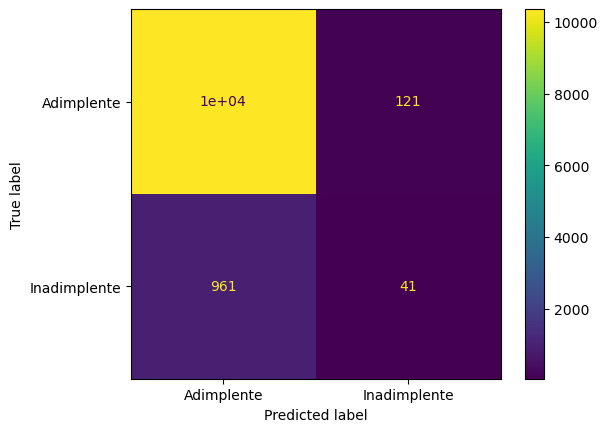

In [13]:
# Melhorando a visualização da matriz de confusão
from sklearn.metrics import ConfusionMatrixDisplay

visualizacao = ConfusionMatrixDisplay(confusion_matrix= matriz_confusão, display_labels=['Adimplente', 'Inadimplente'])
visualizacao.plot();

In [14]:
# Acurácia
from sklearn.metrics import accuracy_score
print(f'Acurácia: {accuracy_score(y_val, y_previsto)}')


Acurácia: 0.9057573382109573


In [15]:
# Precisao e Recall
from sklearn.metrics import precision_score, recall_score
print(f'Precisão: {precision_score(y_val, y_previsto)}')
print(f'Recall: {recall_score(y_val, y_previsto)}')

Precisão: 0.25308641975308643
Recall: 0.04091816367265469


In [16]:
# F1 score
from sklearn.metrics import f1_score
print(f'F1-Score: {f1_score(y_val, y_previsto)}')

F1-Score: 0.070446735395189


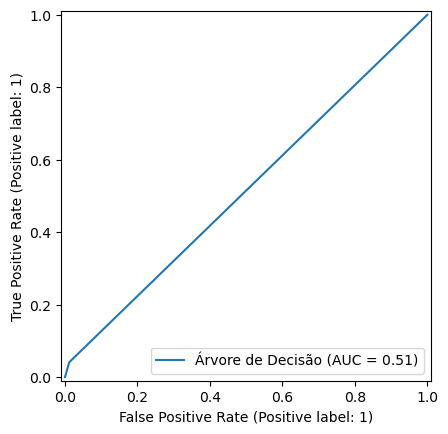

In [17]:
# Curva ROC
from sklearn.metrics import RocCurveDisplay
RocCurveDisplay.from_predictions(y_val, y_previsto, name = 'Árvore de Decisão');

In [18]:
from sklearn.metrics import roc_auc_score
print(f'AUC: {roc_auc_score(y_val, y_previsto)}')

AUC: 0.5146856301710921


### Curva de Precisão e Recall

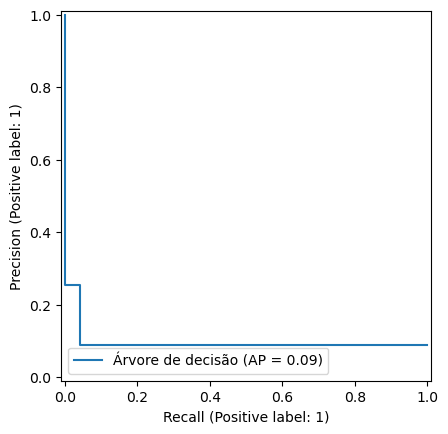

In [19]:
from sklearn.metrics import PrecisionRecallDisplay
PrecisionRecallDisplay.from_predictions(y_val, y_previsto, name='Árvore de decisão');


In [20]:
from sklearn.metrics import average_precision_score
print(f'AP: {average_precision_score(y_val, y_previsto)}')

AP: 0.0940593416939827


In [21]:
from sklearn.metrics import classification_report
print(classification_report(y_val, y_previsto))

              precision    recall  f1-score   support

           0       0.92      0.99      0.95     10479
           1       0.25      0.04      0.07      1002

    accuracy                           0.91     11481
   macro avg       0.58      0.51      0.51     11481
weighted avg       0.86      0.91      0.87     11481



### Validação Cruzada k-fold
Os dados de treinamento são separados em partes e uma das partes se torna validação e as outras treinamento. O processo é repetido até que todas as partes em algum momento seja a validação.

In [22]:
from sklearn.model_selection import cross_validate, KFold

In [24]:
model = DecisionTreeClassifier(max_depth= 10)
kf = KFold(n_splits=5, shuffle=True, random_state=5)
cv_resultados = cross_validate(modelo, x, y, cv = kf)
cv_resultados

{'fit_time': array([0.55586171, 0.71216893, 0.55650878, 0.47674537, 0.4970212 ]),
 'score_time': array([0.04987884, 0.03190804, 0.01396275, 0.00598001, 0.00399113]),
 'test_score': array([0.91344584, 0.90810105, 0.90788328, 0.91321864, 0.89939024])}

In [25]:
cv_resultados['test_score']

array([0.91344584, 0.90810105, 0.90788328, 0.91321864, 0.89939024])

In [27]:
media = cv_resultados['test_score'].mean()
desvio_padrao = cv_resultados['test_score'].std()
print(f'Intervalo de confiança: [{media - 2*desvio_padrao}, {min(media + 2*desvio_padrao, 1)}]')

Intervalo de confiança: [0.8982014753942339, 0.918614141076341]


In [29]:
# Validação cruzada com recall
def intervalo_conf(resultados):
    media = resultados['test_score'].mean()
    desvio_padrao = resultados['test_score'].std()
    print(f'Intervalo de confiança: [{media - 2*desvio_padrao}, {min(media + 2*desvio_padrao, 1)}]')

In [30]:
model = DecisionTreeClassifier(max_depth= 10)
kf = KFold(n_splits=5, shuffle=True, random_state=5)
cv_resultados = cross_validate(modelo, x, y, cv = kf, scoring='recall')
cv_resultados

{'fit_time': array([0.36307693, 0.36492777, 0.35139942, 0.31517482, 0.31877398]),
 'score_time': array([0.0119772 , 0.0089767 , 0.00997186, 0.01196933, 0.02159023]),
 'test_score': array([0.02509908, 0.0210396 , 0.0196802 , 0.01697128, 0.02312139])}

In [31]:
intervalo_conf(cv_resultados)

Intervalo de confiança: [0.015588700826154746, 0.026775916260323294]


#### Estratificando dados


In [32]:
dados['inadimplente'].value_counts(normalize=True)

0    0.912707
1    0.087293
Name: inadimplente, dtype: float64

In [35]:
from sklearn.model_selection import StratifiedKFold
modelo = DecisionTreeClassifier(max_depth=10)
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=5)
cv_resultados = cross_validate(modelo, x, y, cv=skf, scoring = 'recall')

In [36]:
intervalo_conf(cv_resultados)

Intervalo de confiança: [0.01835935262408535, 0.03601656774976156]


### Melhorando o modelo

#### Oversampling - Aumenta a quantidade de dados da classe tem menor quantidade

In [37]:
from imblearn.over_sampling import SMOTE

In [38]:
oversample = SMOTE()
x_balanceado, y_balanceado = oversample.fit_resample(x, y)

In [39]:
y_balanceado.value_counts(normalize = True)

0    0.5
1    0.5
Name: inadimplente, dtype: float64

In [40]:
modelo = DecisionTreeClassifier(max_depth=10) 
skf = StratifiedKFold(n_splits = 5, shuffle=True, random_state=5)
cv_resultados = cross_validate(modelo, x_balanceado, y_balanceado, cv = skf, scoring = 'recall')

In [41]:
intervalo_conf(cv_resultados)

Intervalo de confiança: [0.7280789842284728, 0.7602774692899462]


#### Pipeline para validação
É necessário fazer um pipeline para validação, porque os dados precisam ser balanceados para que o treino seja realizado, mas o teste é feito nos dados desbalanceados, que é como os dados são recebidos para análise.

In [43]:
from imblearn.pipeline import Pipeline as imbpipeline

In [ ]:
modelo =  DecisionTreeClassifier(max_depth= 10)
pipeline = imbpipeline([('oversample', SMOTE()), ('arvore', modelo)])

In [45]:
skf = StratifiedKFold(n_splits = 5, shuffle=True, random_state=5)
cv_resultados = cross_validate(pipeline, x, y, cv = skf, scoring = 'recall')

In [46]:
intervalo_conf(cv_resultados)

Intervalo de confiança: [0.19824188725852157, 0.33008336702150876]


#### Undersampling

In [47]:
from imblearn.under_sampling import NearMiss

In [48]:
modelo =  DecisionTreeClassifier(max_depth= 10)
pipeline = imbpipeline([('undersample', NearMiss(version=3)), ('arvore', modelo)])
skf = StratifiedKFold(n_splits = 5, shuffle=True, random_state=5)
cv_resultados = cross_validate(pipeline, x, y, cv = skf, scoring = 'recall')

In [49]:
intervalo_conf(cv_resultados)

Intervalo de confiança: [0.6273084400720611, 0.6966974005075136]


### Testando o modelo

              precision    recall  f1-score   support

           0       0.94      0.48      0.64      7397
           1       0.11      0.70      0.20       707

    accuracy                           0.50      8104
   macro avg       0.53      0.59      0.42      8104
weighted avg       0.87      0.50      0.60      8104



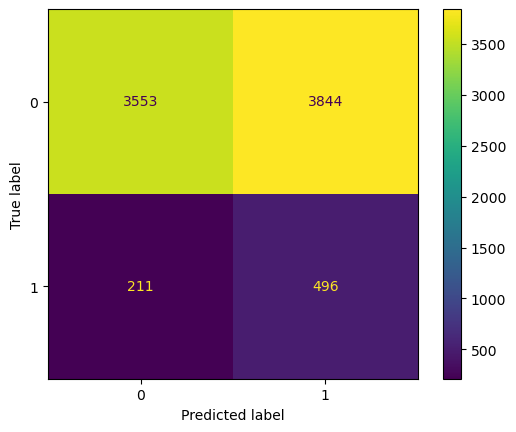

In [51]:
undersample = NearMiss(version=3)
x_balanceado, y_balanceado = undersample.fit_resample(x, y)

modelo = DecisionTreeClassifier(max_depth=10)
modelo.fit(x_balanceado, y_balanceado)
y_previsto = modelo.predict(x_teste)

print(classification_report(y_teste, y_previsto))
ConfusionMatrixDisplay.from_predictions(y_teste, y_previsto)